In [842]:
import numpy as np
import matplotlib.pyplot as plt
import pydot
import pickle
import pathlib
import os
from scipy import stats
import random
from sklearn.metrics import r2_score
plt.rcParams['figure.figsize'] = [10, 5]
#import unicode

from scipy.optimize import curve_fit
import re
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
import statistics

In [733]:
#directory = str(pathlib.Path(__file__).parent.resolve())
#script_path = str(pathlib.Path(__file__).parent.resolve())
directory = os.getcwd()
script_path = os.getcwd()
nameset,dictset = [],[]
refnameset,refdictset = [],[]

refsortset = []
sortset = []


for filename in os.listdir(directory):
    if filename.endswith(".txt") and '._' not in filename:
        if 'REF' not in filename:
            impath = os.path.join(directory, filename)
            nameset.append(impath)
            this_set = dict()
            with (open(impath, encoding = 'utf8', errors = 'ignore')) as f: #populate dict from text file
                for n in f:
                    pog = n.split('\t')
                    this_set[pog[0]] = pog[-1].count(',')
                f.close()
            try:
                this_set.pop('cell_name')
                this_set.pop('AB')
            except: pass
            dictset.append(this_set)
            sortset.append((impath, this_set))
        else:
            impath = os.path.join(directory, filename)
            refnameset.append(impath)
            this_set = dict()
            with (open(impath, encoding = 'utf8', errors = 'ignore')) as f: #populate dict from text file
                for n in f:
                    pog = n.split('\t')
                    this_set[pog[0]] = pog[-1].count(',')
                f.close()
            try:
                this_set.pop('cell_name')
                this_set.pop('AB')
            except: pass
            refdictset.append(this_set)
            refsortset.append((impath, this_set))
    
print(len(dictset),len(nameset))
print(len(refdictset),len(refnameset))
truncator = len(nameset)

nameset,dictset = [],[]
for n in sorted(sortset):
    nameset.append(n[0]);dictset.append(n[1])

refnameset,refdictset = [],[]
for n in sorted(refsortset):
    refnameset.append(n[0]);refdictset.append(n[1])

1322 1322
30 30


In [734]:
def remove_dangling_children(oldshi):
    poor = list(oldshi);dishi = dict()
    for n in range(1,len(poor)-1):
        if (len(poor[n]) == len(poor[n+1]) or len(poor[n]) == len(poor[n-1])) == False: dishi[poor[n]] = oldshi[poor[n]]
    return dishi

#'''
nameset,dictset = [],[]
for n in sorted(sortset):
    nameset.append(n[0]);dictset.append(remove_dangling_children(n[1]))
    
refnameset,refdictset = [],[]
for n in sorted(refsortset):
    refnameset.append(n[0]);refdictset.append(remove_dangling_children(n[1]))
#'''

In [735]:
print(len(dictset),len(nameset))
print(len(refdictset),len(refnameset))

1322 1322
30 30


In [736]:
#part 1 of common node
refnodelist = set(refdictset[0])
for n in refdictset:
    refnodelist = set(n).intersection(refnodelist)

In [737]:
#part 2 of common node
newdictset = []
for n in refdictset:
    newdict = dict()
    for i in refnodelist:
        newdict[i] = n[i]
    #print(set(newdict).issubset(set(n)))
    #print(len(newdict))
    newdictset.append(newdict)

#print(set(newdict).issubset(set(n)))
refdictset = newdictset

In [738]:
def scramble(dict_list):
    dict_return = []
    for element in dict_list:
        valuescramble = list(element.values())
        random.shuffle(valuescramble)
        keyscramble = list(element)
        random.shuffle(keyscramble)
        new_element = dict()
        for n in range(0,len(keyscramble)):
            new_element[keyscramble[n]] = valuescramble[n]
        dict_return.append(new_element)
    return dict_return
def globalize(dictn):
    globaldictset = []
    for i in dictn:
        tags = sorted(list(i));dip = dict()
        for n in tags:
            if n[0:-1] in i:
                dip[n] = i[n] + dip[n[:-1]]
            else: dip[n] = i[n]    
        globaldictset.append(dip)
    return globaldictset

In [739]:
#scrambledictset = scramble(dictset)
globaldictset = globalize(dictset)
#globalscrambledictset = globalize(scrambledictset)

#refscrambledictset = scramble(refdictset)
refglobaldictset = globalize(refdictset)
#refglobalscrambledictset = globalize(refscrambledictset)

In [740]:
qf = pd.read_csv('1368-embryos.csv', header=None).iloc[0]
df = pd.read_csv('1368-embryos.csv')
rdf = df.sort_values(by = 'embryo-ID')
cuttags = ['ABa','ABp','C','D','E','MS','P']
rearranger = [0,1,4,5,3,2,6]

match_links = []
match_links2 = []

findit = 0
notin = 0

o = 0
for n in range(0,df.shape[0]):
    #print(rdf.iloc[n][1] in nameset[o])
    if rdf.iloc[n][1] in nameset[o]:
        #match_links.append((o,n)) #, o in nameset, #n in dataframe
        match_links.append(n) #index is o in nameset, list value is n in dataframe
        tagref = 0
        for nm in list(globaldictset[o]):
            if cuttags[tagref] not in nm:
                try:
                    tagref = tagref + 1
                    if tagref > 6:
                        break
                except:
                    break
            #findit = findit + (globaldictset[o][nm] >= rdf.iloc[n][rearranger[tagref]+5])
            if (globaldictset[o][nm] >= rdf.iloc[n][rearranger[tagref]+5]): 
                #print(nameset[o].split('/')[-1])
                print(rdf.iloc[n][1])
                print('tag',o,'embryo',n,nm,globaldictset[o][nm],rdf.iloc[n][rearranger[tagref]+5])
                del dictset[o][nm]
        o = o + 1
    else:
        pass
        match_links2.append((o,-1))
        #match_links2.append(-1)
o,n

CUL-1_HYP_E0250
tag 239 embryo 248 ABarppaaaa 185 170
CUL-1_HYP_E0250
tag 239 embryo 248 ABarppaapa 170 170
CUL-1_HYP_E0250
tag 239 embryo 248 ABarppapaa 171 170
CUL-1_HYP_E0250
tag 239 embryo 248 ABarppapap 176 170
CUL-1_HYP_E0250
tag 239 embryo 248 ABarppappa 173 170
CUL-1_HYP_E0250
tag 239 embryo 248 ABarppappp 191 170
CUL-1_HYP_E0250
tag 239 embryo 248 ABarpppaaa 184 170
CUL-1_HYP_E0250
tag 239 embryo 248 ABarpppaap 178 170
CUL-1_HYP_E0250
tag 239 embryo 248 ABarpppapa 179 170
CUL-1_HYP_E0250
tag 239 embryo 248 ABarpppapp 183 170
CUL-1_HYP_E0250
tag 239 embryo 248 ABarppppaa 172 170
CUL-1_HYP_E0250
tag 239 embryo 248 ABarppppap 171 170
CUL-1_HYP_E0250
tag 239 embryo 248 ABarpppppa 176 170
CUL-1_HYP_E0250
tag 239 embryo 248 ABarpppppp 181 170
CUL-1_HYP_E0250
tag 239 embryo 248 ABplappaap 172 170
CUL-1_HYP_E0250
tag 239 embryo 248 ABplappapa 172 170
CUL-1_HYP_E0250
tag 239 embryo 248 ABplapppaa 178 170
CUL-1_HYP_E0250
tag 239 embryo 248 ABplapppap 184 170
CUL-1_HYP_E0250
tag 239 embr

(1322, 1367)

In [741]:
scrambledictset = scramble(dictset)
globaldictset = globalize(dictset)
globalscrambledictset = globalize(scrambledictset)

refscrambledictset = scramble(refdictset)
refglobaldictset = globalize(refdictset)
refglobalscrambledictset = globalize(refscrambledictset)

In [742]:
globaldictset[239]['ABarppaaa']

114

In [743]:
print(len(match_links2))

46


In [744]:
#for n in range(0,len(match_links)):
#    print(n,match_links[n])
#print(match_links2)

In [745]:
def single_dim(namein,dictin,seps = '',tier = False):
    namelist,yaxis,xaxis = sorted(list(dictin), key = len ),[],[];target_xaxis=[];target_yaxis=[]
    if seps == '' or tier == True:
        for n in namelist:
            yaxis.append(dictin[n])
            xaxis.append(len(re.sub(r'[A-Z]', '', n)))
    else:
        for n in namelist:
            if seps in n:
                target_yaxis.append(dictin[n])
                target_xaxis.append(len(re.sub(r'[A-Z]', '', n)))
            else:
                yaxis.append(dictin[n])
                xaxis.append(len(re.sub(r'[A-Z]', '', n)))
    xaxis = np.array(xaxis)
    if tier == True: return xaxis, yaxis
    target_xaxis = np.array(target_xaxis)
    m, b, r, p_value, std_err = stats.linregress(np.append(xaxis,target_xaxis),yaxis+target_yaxis)
    namein = namein.split('/')[-1][:-4]
    plt.scatter(xaxis,yaxis, label='Full Lineage,r^2='+str(r**2))
    plt.title('Cellular Division Timing Events in WT C. Elegans Embryo\n'+namein)
    plt.xlabel('Division Event Count');plt.ylabel('Division Event Timing Increments')
    plt.plot(xaxis, (m*xaxis) + b, 'b-', label='Full Lineage slope:'+str(m))
    if seps != '':
        target_xaxis = np.array(target_xaxis)
        m, b, r, p_value, std_err = stats.linregress(target_xaxis,target_yaxis)
        plt.plot(target_xaxis, (m*target_xaxis) + b, 'r-', label=seps+' slope:'+str(m))
        plt.scatter(target_xaxis,target_yaxis, label = seps+',r^2='+str(r**2))    
    plt.legend(loc='upper left');plt.show()

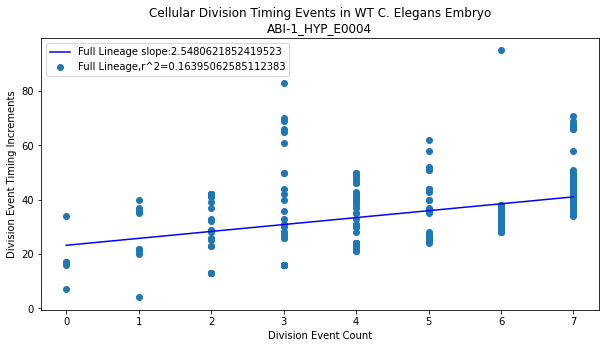

In [746]:
single_dim(nameset[1],dictset[1])

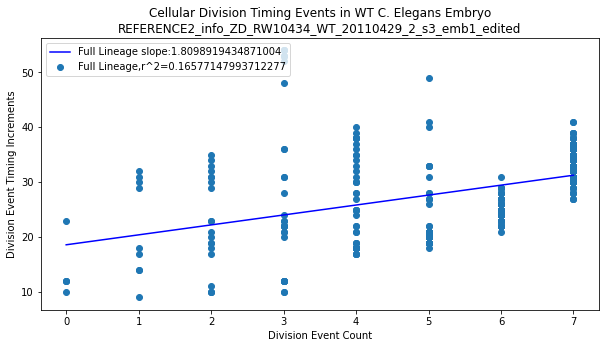

In [747]:
single_dim(refnameset[1],refdictset[1])

In [748]:
#single_dim(nameset[1],dictset[1], seps = 'AB');#ingle_dim(refnameset[1],refdictset[1], seps = 'AB')

In [749]:
#single_dim(nameset[1],globaldictset[1]);single_dim(refnameset[1],refglobaldictset[1])

In [750]:
#single_dim(nameset[1],globaldictset[1], seps = 'AB');single_dim(refnameset[1],refglobaldictset[1], seps = 'AB')

In [751]:
def dict_to_scatter(name,lis,x,y,img = False,seps='', tier = False):
    xaxis = [];yaxis = []
    target_xaxis=[];target_yaxis=[]
    if seps == '' or tier == True:
        for n in (list(set(lis[x]).intersection(set(lis[y])))):
            xaxis.append(lis[x][n]);yaxis.append(lis[y][n])
    else:
        target_xaxis=[];target_yaxis=[]
        for n in (list(set(lis[x]).intersection(set(lis[y])))):
            if seps in n:
                target_xaxis.append(lis[x][n])
                target_yaxis.append(lis[y][n])
            else:
                xaxis.append(lis[x][n]);yaxis.append(lis[y][n])
    target_xaxis = np.array(target_xaxis);xaxis = np.array(xaxis)
    if tier == True: return xaxis, yaxis
    m, b, r, p_value, std_err = stats.linregress(np.append(xaxis,target_xaxis),yaxis+target_yaxis)
    #switch to siegelslope & theilsslope functions?
    name1,name2 = name[x].split('/')[-1][:-4],name[y].split('/')[-1][:-4]
    if img == False: return m,b,r,name1,name2
    plt.scatter(xaxis,yaxis, label='Full Lineage,r^2='+str(r**2) ) #''', c = [0]*len(xaxis) ''')
    plt.title('Cellular Division Timing Discrepancies in WT C. Elegans Embryos');plt.xlabel(name1+'\nDivision Event Timing Increments');plt.ylabel(name2+'\nDivision Event Timing Increments')
    plt.plot(xaxis, (m*xaxis) + b, 'b-', label='Full Lineage slope:'+str(m), )
    if seps != '':
        target_xaxis = np.array(target_xaxis)
        m, b, r, p_value, std_err = stats.linregress(target_xaxis,target_yaxis)
        plt.plot(target_xaxis, (m*target_xaxis) + b, 'r-', label=seps+' slope:'+str(m))
        plt.scatter(target_xaxis,target_yaxis, label = seps+',r^2='+str(r**2) ) #''', c = [1]*len(target_xaxis) ''')
        xaxis = np.append(xaxis,target_xaxis); yaxis = np.append(yaxis,target_yaxis)
    m, b, r, p_value, std_err = stats.linregress(xaxis,yaxis)
    plt.legend(loc='upper left')
    #print(xaxis,target_xaxis)
    #print(np.append(xaxis,target_xaxis))
    #print(yaxis,target_yaxis)
    #print(np.append(yaxis,target_yaxis))
    #plt.savefig(name1+'&'+name2+'.png') #return m,b,r,name1,name2
    plt.show()

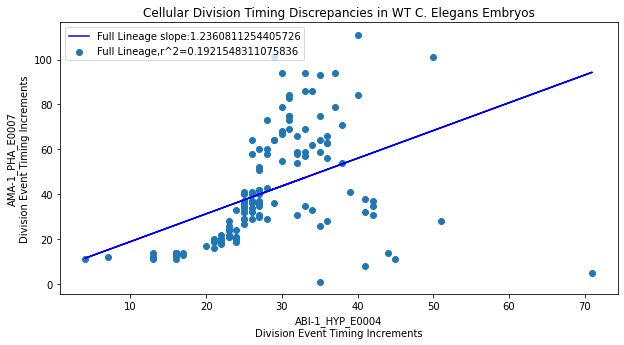

In [752]:
dict_to_scatter(nameset,dictset,1,10,img=True)

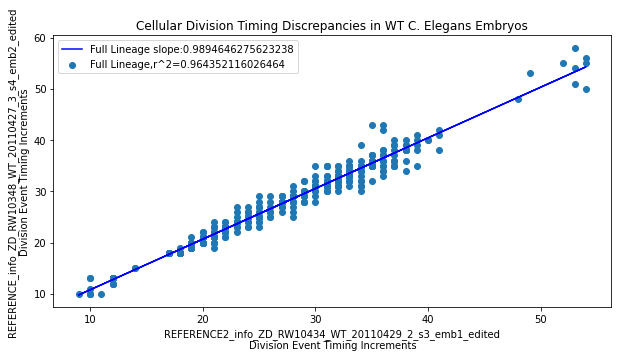

In [753]:
dict_to_scatter(refnameset,refdictset,1,10,img=True)

In [754]:
#dict_to_scatter(nameset,dictset,1,10,img=True,seps = 'AB');dict_to_scatter(refnameset,refdictset,1,10,img=True,seps = 'AB')

In [755]:
#dict_to_scatter(nameset,globaldictset,1,10,img=True);dict_to_scatter(refnameset,refglobaldictset,1,10,img=True)

In [756]:
#dict_to_scatter(nameset,globaldictset,1,10,img=True, seps = 'AB');dict_to_scatter(refnameset,refglobaldictset,1,10,img=True, seps = 'AB')

In [757]:
def match_fit(xaxis,yaxis):
    sorted_xaxis = np.array(range(min(xaxis),max(xaxis)))
    xaxis = np.array(xaxis)
    p1 = np.poly1d(np.polyfit(xaxis, yaxis, 1));p2 = np.poly1d(np.polyfit(xaxis, yaxis, 2));p3 = np.poly1d(np.polyfit(xaxis, yaxis, 3))
    plt.scatter(xaxis,yaxis, label='Lineage,r^2=') 
    corr_matrix = np.corrcoef(yaxis, p1(xaxis));corr = corr_matrix[0,1];R_sq = corr**2
    plt.plot(xaxis, p1(xaxis), 'b-', label='linear r^2:'+str(R_sq), )
    corr_matrix = np.corrcoef(yaxis, p2(xaxis));corr = corr_matrix[0,1];R_sq = corr**2
    plt.plot(sorted_xaxis, p2(sorted_xaxis), 'r-', label='quad r^2:'+str(R_sq), )
    corr_matrix = np.corrcoef(yaxis, p3(xaxis));corr = corr_matrix[0,1];R_sq = corr**2
    plt.plot(sorted_xaxis, p3(sorted_xaxis), 'g-', label='cubic r^2:'+str(R_sq), )
    plt.title('Cellular Division Timing Discrepancies in WT C. Elegans Embryos')
    #plt.xlabel(name1+'\nDivision Event Timing Increments')
    #plt.ylabel(name2+'\nDivision Event Timing Increments')
    
    
    plt.legend(loc='upper left')
    plt.show()

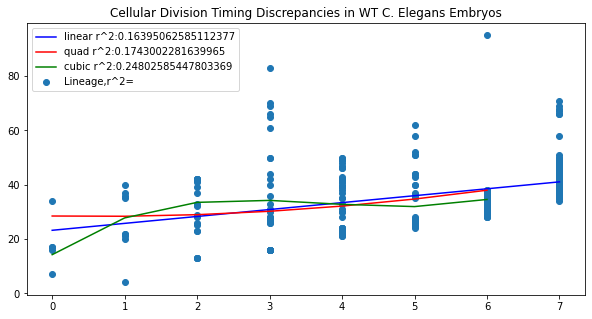

In [758]:
x,y = single_dim(nameset[1],dictset[1],tier = True);match_fit(x,y)

In [759]:
#x,y = single_dim(refnameset[1],refdictset[1],tier = True);match_fit(x,y)

In [760]:
#x,y = single_dim(nameset[1],globaldictset[1],tier = True);match_fit(x,y)

In [761]:
#x,y = single_dim(refnameset[1],refglobaldictset[1],tier = True);match_fit(x,y)

In [762]:
#x,y = dict_to_scatter(nameset,dictset,1,10,img=True,tier = True); match_fit(x,y)

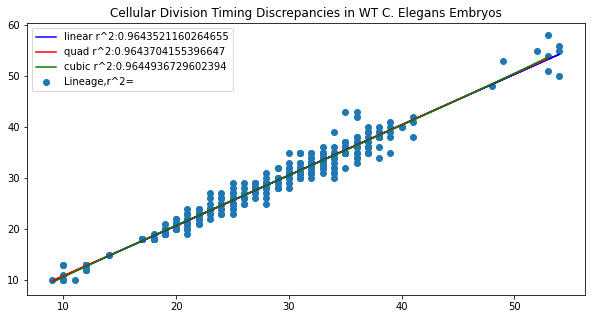

In [763]:
x,y = dict_to_scatter(refnameset,refdictset,1,10,img=True,tier = True); match_fit(x,y)

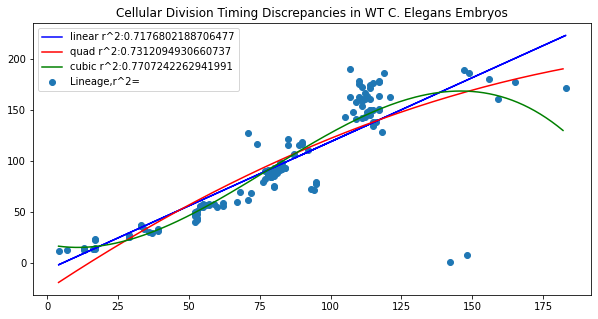

In [764]:
x,y = dict_to_scatter(nameset,globaldictset,1,10,img=True,tier = True); match_fit(x,y)

In [765]:
#x,y = dict_to_scatter(refnameset,refglobaldictset,1,10,img=True,tier = True); match_fit(x,y)

In [766]:

def dict_to_scatter_connect(name,lis,x,yname,ylis,y,img = False,seps='', tier = False):
    xaxis = [];yaxis = []
    target_xaxis=[];target_yaxis=[]
    if seps == '' or tier == True:
        for n in (list(set(lis[x]).intersection(set(ylis[y])))):
            xaxis.append(lis[x][n]);yaxis.append(ylis[y][n])
    else:
        target_xaxis=[];target_yaxis=[]
        for n in (list(set(lis[x]).intersection(set(ylis[y])))):
            if seps in n:
                target_xaxis.append(lis[x][n])
                target_yaxis.append(ylis[y][n])
            else:
                xaxis.append(lis[x][n]);yaxis.append(ylis[y][n])
    target_xaxis = np.array(target_xaxis);xaxis = np.array(xaxis)
    if tier == True: return xaxis, yaxis
    m, b, r, p_value, std_err = stats.linregress(np.append(xaxis,target_xaxis),yaxis+target_yaxis)
    #switch to siegelslope & theilsslope functions?
    name1,name2 = name[x].split('/')[-1][:-4],yname[y].split('/')[-1][:-4]
    if img == False: return m,b,r,name1,name2
    plt.scatter(xaxis,yaxis, label='Full Lineage,r^2='+str(r**2) ) #''', c = [0]*len(xaxis) ''')
    plt.title('Cellular Division Timing Discrepancies in WT C. Elegans Embryos');plt.xlabel(name1+'\nDivision Event Timing Increments');plt.ylabel(name2+'\nDivision Event Timing Increments')
    plt.plot(xaxis, (m*xaxis) + b, 'b-', label='Full Lineage slope:'+str(m), )
    if seps != '':
        target_xaxis = np.array(target_xaxis)
        m, b, r, p_value, std_err = stats.linregress(target_xaxis,target_yaxis)
        plt.plot(target_xaxis, (m*target_xaxis) + b, 'r-', label=seps+' slope:'+str(m))
        plt.scatter(target_xaxis,target_yaxis, label = seps+',r^2='+str(r**2) ) #''', c = [1]*len(target_xaxis) ''')
        xaxis = np.append(xaxis,target_xaxis); yaxis = np.append(yaxis,target_yaxis)
    m, b, r, p_value, std_err = stats.linregress(xaxis,yaxis)
    plt.legend(loc='upper left')
    #print(xaxis,target_xaxis)
    #print(np.append(xaxis,target_xaxis))
    #print(yaxis,target_yaxis)
    #print(np.append(yaxis,target_yaxis))
    #plt.savefig(name1+'&'+name2+'.png') #return m,b,r,name1,name2
    plt.show()
    
dict_to_scatter_connect(refnameset,refdictset,1,nameset,dictset,9)

(4.683294663573085,
 -18.198375870069597,
 0.5608291565417564,
 'REFERENCE2_info_ZD_RW10434_WT_20110429_2_s3_emb1_edited',
 'AMA-1_NEU_E0012')

In [767]:
len(list(cleaner(refdictset,refglobaldictset,1,match_links,dictset,globaldictset,78)))
#print(len(list(dictset[81])))

350

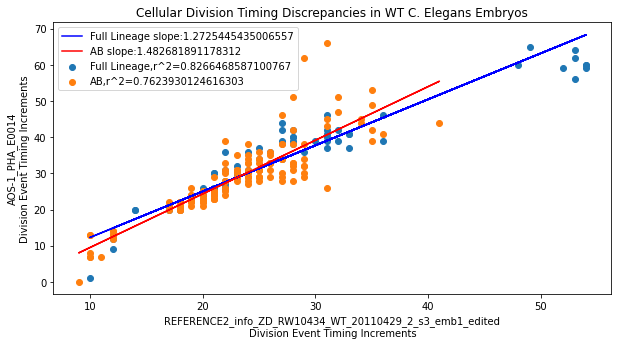

In [768]:
dict_to_scatter_connect(refnameset,refdictset,1,nameset,dictset,17,img=True, seps = 'AB')

In [769]:
#wed = 
#dict_to_scatter_connect(refnameset,refdictset,1,nameset,dictset,17,img=True, seps = 'AB')

In [964]:
def plot_2_examples(colormaps,imp): #heatmap matrix plotting function
    data = imp;n = len(colormaps)
    fig, axs = plt.subplots(1, n, figsize=(n, n),
                            constrained_layout=False, squeeze=False)
    for [ax, cmap] in zip(axs.flat, colormaps):
        psm = ax.pcolormesh(data, cmap=cmap, rasterized=True, vmin=(int(10*np.amin(imp))/10.0), vmax=(int(10*np.amax(imp))/10.0))
        fig.colorbar(psm, ax=ax)
    plt.title('Distance between times in WT C. Elegans')
    #plt.figure(figsize = (15,8))
    plt.gcf().set_size_inches(35, 25)
    plt.show()

In [771]:
'''
https://scikit-learn.org/stable/auto_examples/neighbors/plot_kde_1d.html#sphx-glr-auto-examples-neighbors-plot-kde-1d-py
'''

'\nhttps://scikit-learn.org/stable/auto_examples/neighbors/plot_kde_1d.html#sphx-glr-auto-examples-neighbors-plot-kde-1d-py\n'

In [772]:
#dict_to_scatter_connect(refnameset,refdictset,1,nameset,dictset,9)
'''

r_mat = [];g_mat = [];s_mat=[];gs_mat=[]
for n in range(0,len(refnameset)):
    r_row = [];g_row = [];s_row=[];gs_row=[]
    for m in range(0,len(nameset)):
        m2,b,r,name1,name2 = dict_to_scatter_connect(refnameset,refdictset,n,nameset,dictset,m)
        r_row.append(r**2)
        m2,b,r,name1,name2 = dict_to_scatter_connect(refnameset,refglobaldictset,n,nameset,globaldictset,m)
        g_row.append(r**2)
        m2,b,r,name1,name2 = dict_to_scatter_connect(refnameset,refscrambledictset,n,nameset,scrambledictset,m)
        s_row.append(r**2)
        m2,b,r,name1,name2 = dict_to_scatter_connect(refnameset,refglobalscrambledictset,n,nameset,globalscrambledictset,m)
        gs_row.append(r**2)
    print(n/len(refnameset))
    r_mat.append(r_row);g_mat.append(g_row);s_mat.append(s_row);gs_mat.append(gs_row)
    #print(len(zee))
#r_mat.reverse()

r_mat = (np.mat(r_mat).T + np.mat(r_mat)) - np.diag([1]*len(r_mat))
g_mat = (np.mat(g_mat).T + np.mat(g_mat)) - np.diag([1]*len(g_mat))
s_mat = (np.mat(s_mat).T + np.mat(s_mat)) - np.diag([1]*len(s_mat))
gs_mat = (np.mat(gs_mat).T + np.mat(gs_mat)) - np.diag([1]*len(gs_mat))

scrambledictset = scramble(dictset)
globaldictset = globalize(dictset)
globalscrambledictset = globalize(scrambledictset)

refscrambledictset = scramble(refdictset)
refglobaldictset = globalize(refdictset)
refglobalscrambledictset = globalize(refscrambledictset)




'''
#plot_2_examples(['hot'],np.mat(r_mat))
sorttypes = ['cycle time','birth time', 'T.E.D', 'B.E.D. Cycle Time','B.E.D. Birth Time']
sortlists = [] 

In [792]:
def tree_edit_distance(dict1,dict2): return (len((set(dict1).union(set(dict2))))-len((set(dict1).intersection(set(dict2)))))
#I guess issa metric
'''
ted_list = []
t_mat = []
for n in range(0,len(refnameset)):
    r_row = []
    for m in range(0,len(nameset)):
        k = tree_edit_distance(refdictset[n],dictset[m])
        #print(len(refdictset[n]))
        r_row.append(k)
        ted_list.append(k)
    print(n/len(refnameset))
    t_mat.append(r_row)
'''
#t_mat = (np.mat(t_mat).T + np.mat(t_mat)) - np.diag([1]*len(t_mat))

#for n in ted_list: print(n)

'\nted_list = []\nt_mat = []\nfor n in range(0,len(refnameset)):\n    r_row = []\n    for m in range(0,len(nameset)):\n        k = tree_edit_distance(refdictset[n],dictset[m])\n        #print(len(refdictset[n]))\n        r_row.append(k)\n        ted_list.append(k)\n    print(n/len(refnameset))\n    t_mat.append(r_row)\n'

In [793]:
#plot_2_examples(['hot_r'],np.mat(t_mat).T)

"x = np.argsort(t_mat.sum(axis=0))[0]#[::-1]\n\nprint(x)\nplot_2_examples(['hot_r'],np.mat(t_mat[x][0]))\n\n\n#x = np.argsort(np.mat(r_mat).sum(axis=0))\n#x = np.argsort(np.mat(r_mat).sum(axis=0))\nt_mat = np.mat(t_mat)\nx = np.array(np.argsort(np.mat(t_mat).sum(axis=0)))[0]\nx = np.flip(x, 0)\n\n\n#print(len(x[0]),x[0])\n#r_mat = np.mat(r_mat)\n#plot_2_examples(['hot'],np.mat(r_mat[x]))\nplot_2_examples(['hot_r'],np.mat(t_mat.T)[x]) \nrefnameset[7],refnameset[10],refnameset[12],refnameset[25]\n\nsortlists.append(x)\nsortlists"

'sortlistT.append(np.flip(np.array(np.argsort(np.mat(t_mat).T.sum(axis=0)))[0]))\nsortlistT'

'\ntrip = t_mat.sum(axis=0).tolist()\ntrip\n\nplt.hist(trip ) '

In [797]:
trip = t_mat.sum(axis=0).tolist()[0]
#trip

In [798]:
''' 
https://jakevdp.github.io/PythonDataScienceHandbook/05.13-kernel-density-estimation.html
https://www.wessa.net/rwasp_density.wasp#output


x_d = np.linspace(min(trip), max(trip), 2000)
density = sum((abs(xi - x_d) < 70) for xi in trip)

plt.fill_between(x_d, density, alpha=0.5)
plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)
plt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)

plt.axis([min(trip), max(trip), -0.5, 250]);'''

" \nhttps://jakevdp.github.io/PythonDataScienceHandbook/05.13-kernel-density-estimation.html\nhttps://www.wessa.net/rwasp_density.wasp#output\n\n\nx_d = np.linspace(min(trip), max(trip), 2000)\ndensity = sum((abs(xi - x_d) < 70) for xi in trip)\n\nplt.fill_between(x_d, density, alpha=0.5)\nplt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)\nplt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)\n\nplt.axis([min(trip), max(trip), -0.5, 250]);"

In [799]:
'''from scipy.stats import norm
x_d = np.linspace(min(trip), max(trip), 2000)
density = sum(norm(xi,25).pdf(x_d) for xi in trip) * 2
plt.fill_between(x_d, density, alpha=0.5)
plt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)
plt.axis([min(trip), max(trip), -0.5, 5]);'''

"from scipy.stats import norm\nx_d = np.linspace(min(trip), max(trip), 2000)\ndensity = sum(norm(xi,25).pdf(x_d) for xi in trip) * 2\nplt.fill_between(x_d, density, alpha=0.5)\nplt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)\nplt.axis([min(trip), max(trip), -0.5, 5]);"

In [800]:
#print(t_mat[0])
#ted_mat_reals = np.where(-abs(np.array(t_mat)-100)+99 > 0, -1, 0)
#for n in range(len(np.array(ted_mat_real))): ted_mat_real[n][n] = (-np.sum(np.array(ted_mat_real)[n]))
#print(ted_mat_real)
#plot_2_examples(['hot'],np.mat(ted_mat_reals)) #black are edges

In [801]:
def branch_distance(dict1,dict2): #issa metric from deeds
    branch_dist = 0
    for n in list(set(dict1).intersection(set(dict2))):
        branch_dist = branch_dist + (dict1[n]-dict2[n])**2
        #print(n,(dict1[n]-dict2[n])**2, branch_dist)
    return (np.sqrt(branch_dist))

In [802]:
qf = pd.read_csv('1368-embryos.csv', header=None).iloc[0]
df = pd.read_csv('1368-embryos.csv')
rdf = df.sort_values(by = 'embryo-ID')
cuttags = ['ABa','ABp','C','D','E','MS','P']
rearranger = [0,1,4,5,3,2,6]

def cleaner(reflis,refgloballis,x,ML,explis,globalexplis,y):
    n = ML[y]
    tagref = 0
    #print(n)
    #print(rdf.iloc[n])
    burner = dict()
    for nm in list(refgloballis[x]):
        #print(nm)
        if cuttags[tagref] not in nm:
            try:
                tagref = tagref + 1
                if tagref > 6:
                    break
            except:
                break
        if refgloballis[x][nm] >= rdf.iloc[n][rearranger[tagref]+5]: #pass
            print(nm,refgloballis[x][nm],rdf.iloc[n][rearranger[tagref]+5])
        else:
            burner[nm] = reflis[x][nm]
    return burner

In [984]:
b_mat = []
size_edit_mat = []
t_mat = []
for n in range(0,len(nameset)):
    t_row = []
    r_row = []
    b_row = []
    for m in range(0,len(refnameset)):
        #go = cleaner(refdictset,refglobaldictset,m,match_links,dictset,globaldictset,n)
        go = refdictset[m]
        r_row.append(len(go))
        t_row.append(tree_edit_distance(go,dictset[n]))
        b_row.append(branch_distance(go,dictset[n]))
    size_edit_mat.append(r_row)
    t_mat.append(t_row)
    b_mat.append(b_row)
    if n % 20 == 0: print(n/len(nameset))
size_edit_mat = np.mat(size_edit_mat)

0.0
0.015128593040847202
0.030257186081694403
0.0453857791225416
0.060514372163388806
0.07564296520423601
0.0907715582450832
0.1059001512859304
0.12102874432677761
0.1361573373676248
0.15128593040847202
0.1664145234493192
0.1815431164901664
0.19667170953101362
0.2118003025718608
0.22692889561270801
0.24205748865355523
0.25718608169440244
0.2723146747352496
0.2874432677760968
0.30257186081694404
0.3177004538577912
0.3328290468986384
0.34795763993948564
0.3630862329803328
0.37821482602118
0.39334341906202724
0.4084720121028744
0.4236006051437216
0.43872919818456885
0.45385779122541603
0.4689863842662632
0.48411497730711045
0.49924357034795763
0.5143721633888049
0.529500756429652
0.5446293494704992
0.5597579425113465
0.5748865355521936
0.5900151285930408
0.6051437216338881
0.6202723146747352
0.6354009077155824
0.6505295007564297
0.6656580937972768
0.680786686838124
0.6959152798789713
0.7110438729198184
0.7261724659606656
0.7413010590015129
0.75642965204236
0.7715582450832073
0.78668683812

In [985]:
size_edit_mat = np.mat(size_edit_mat) - 350
b_mat = np.mat(b_mat)
t_mat = np.mat(t_mat)

In [986]:
result = np.where(size_edit_mat < 0)
result

(array([], dtype=int64), array([], dtype=int64))

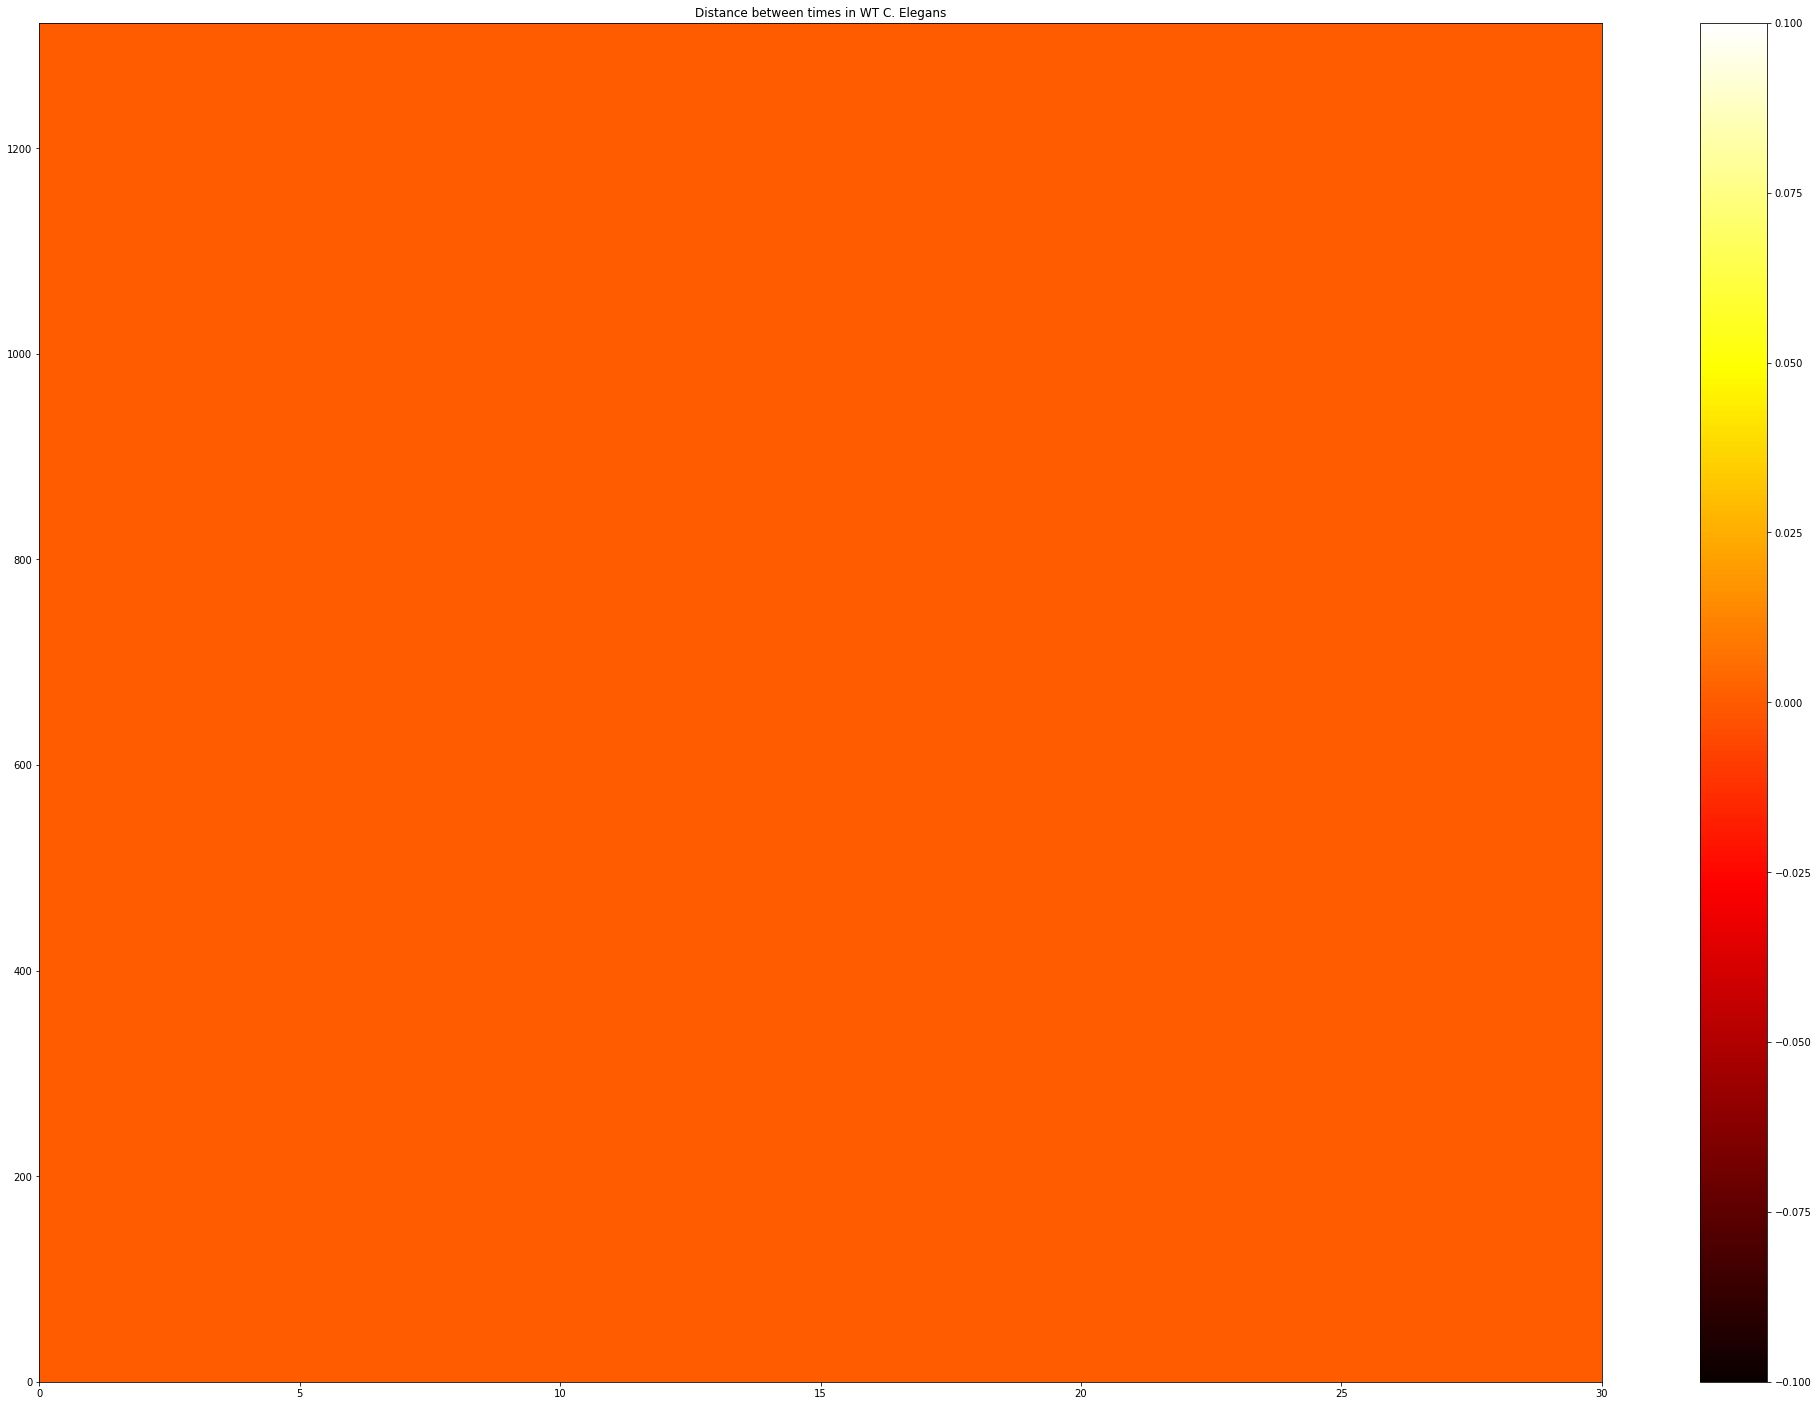

In [987]:
plot_2_examples(['hot'],np.mat(size_edit_mat))

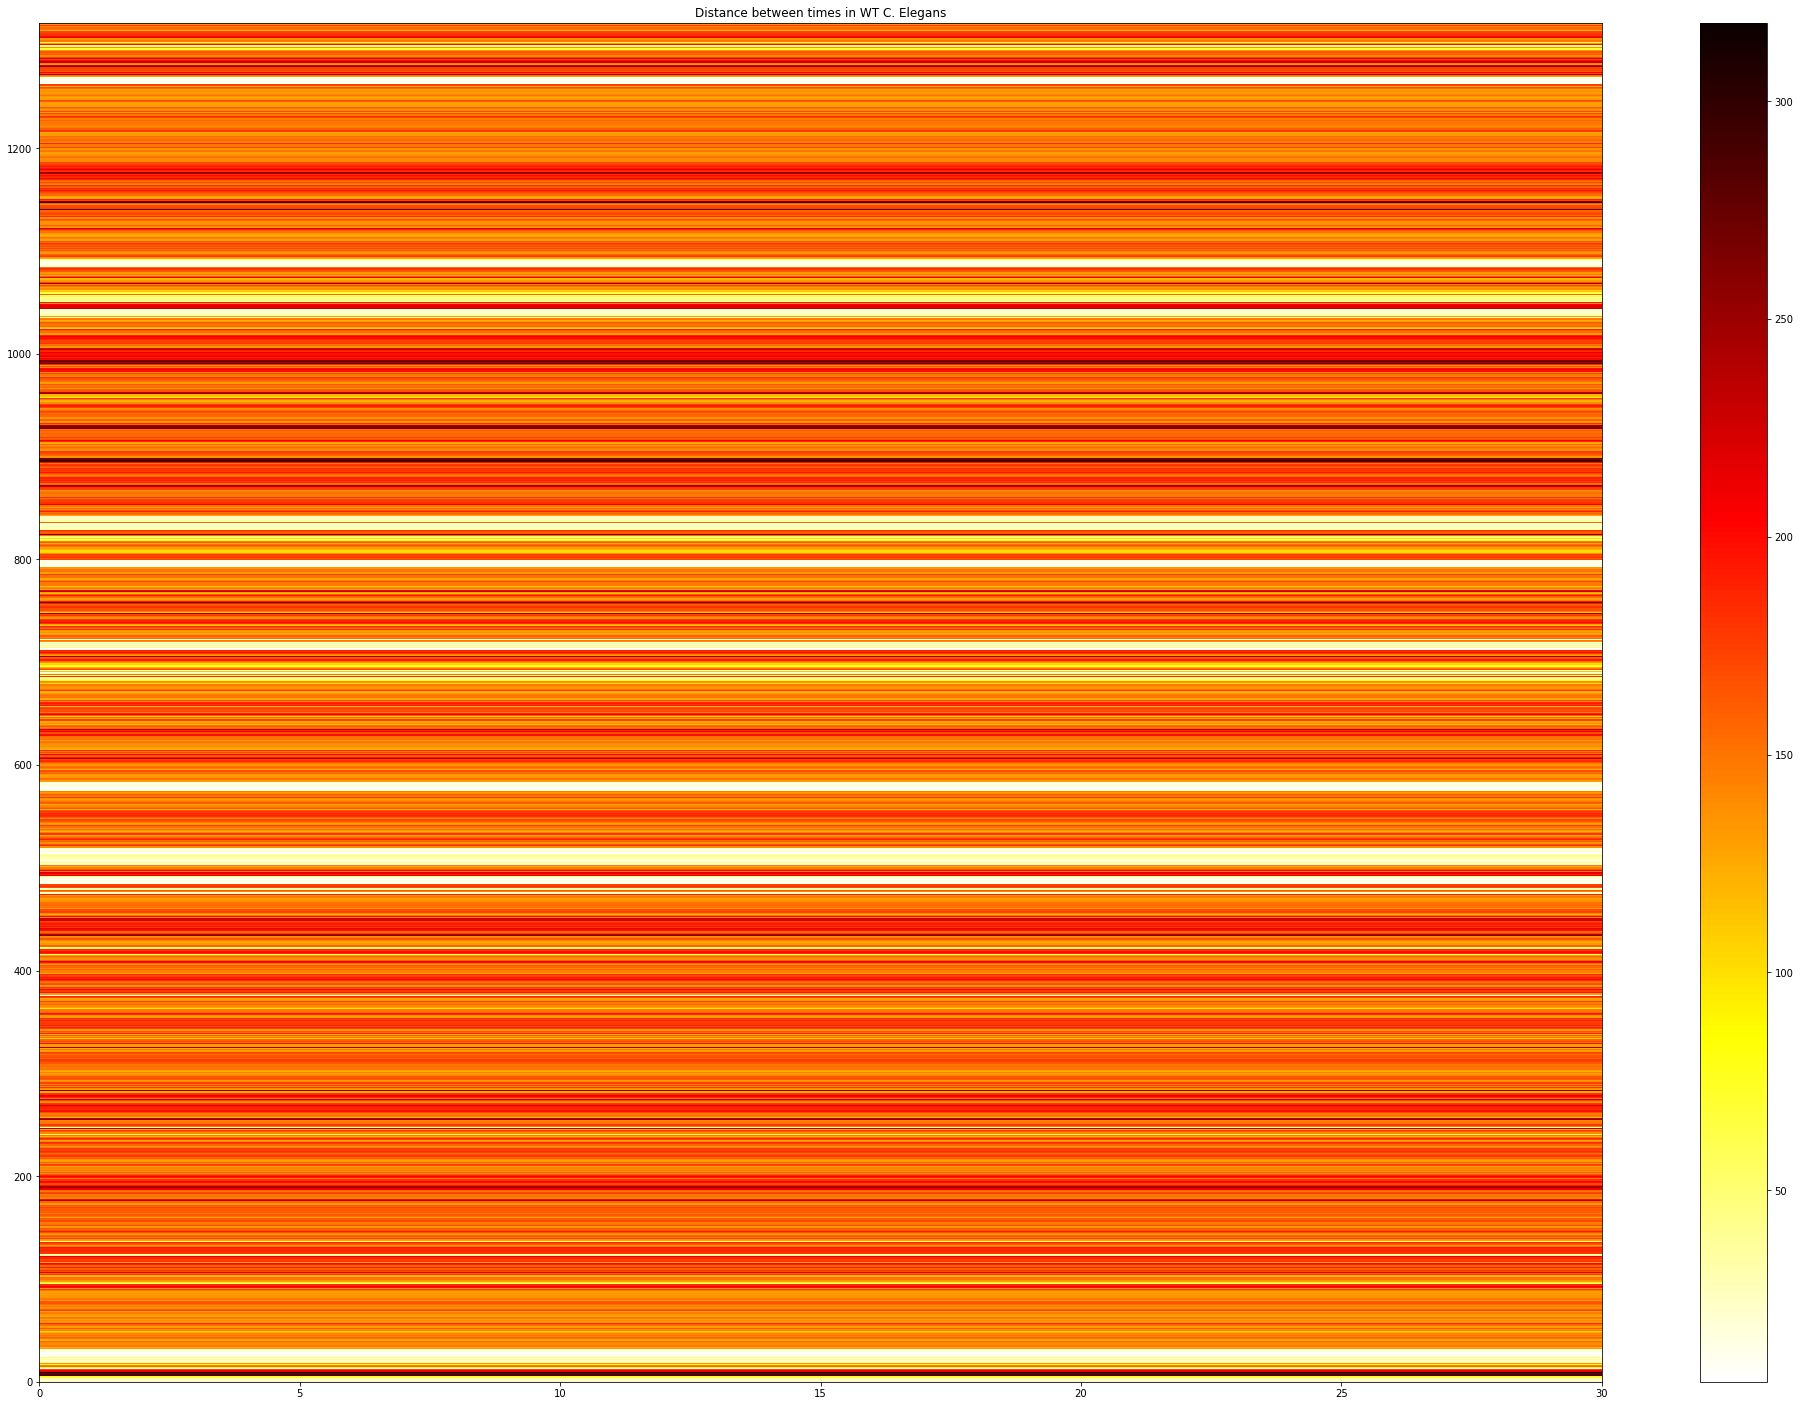

In [988]:
plot_2_examples(['hot_r'],np.mat(t_mat))

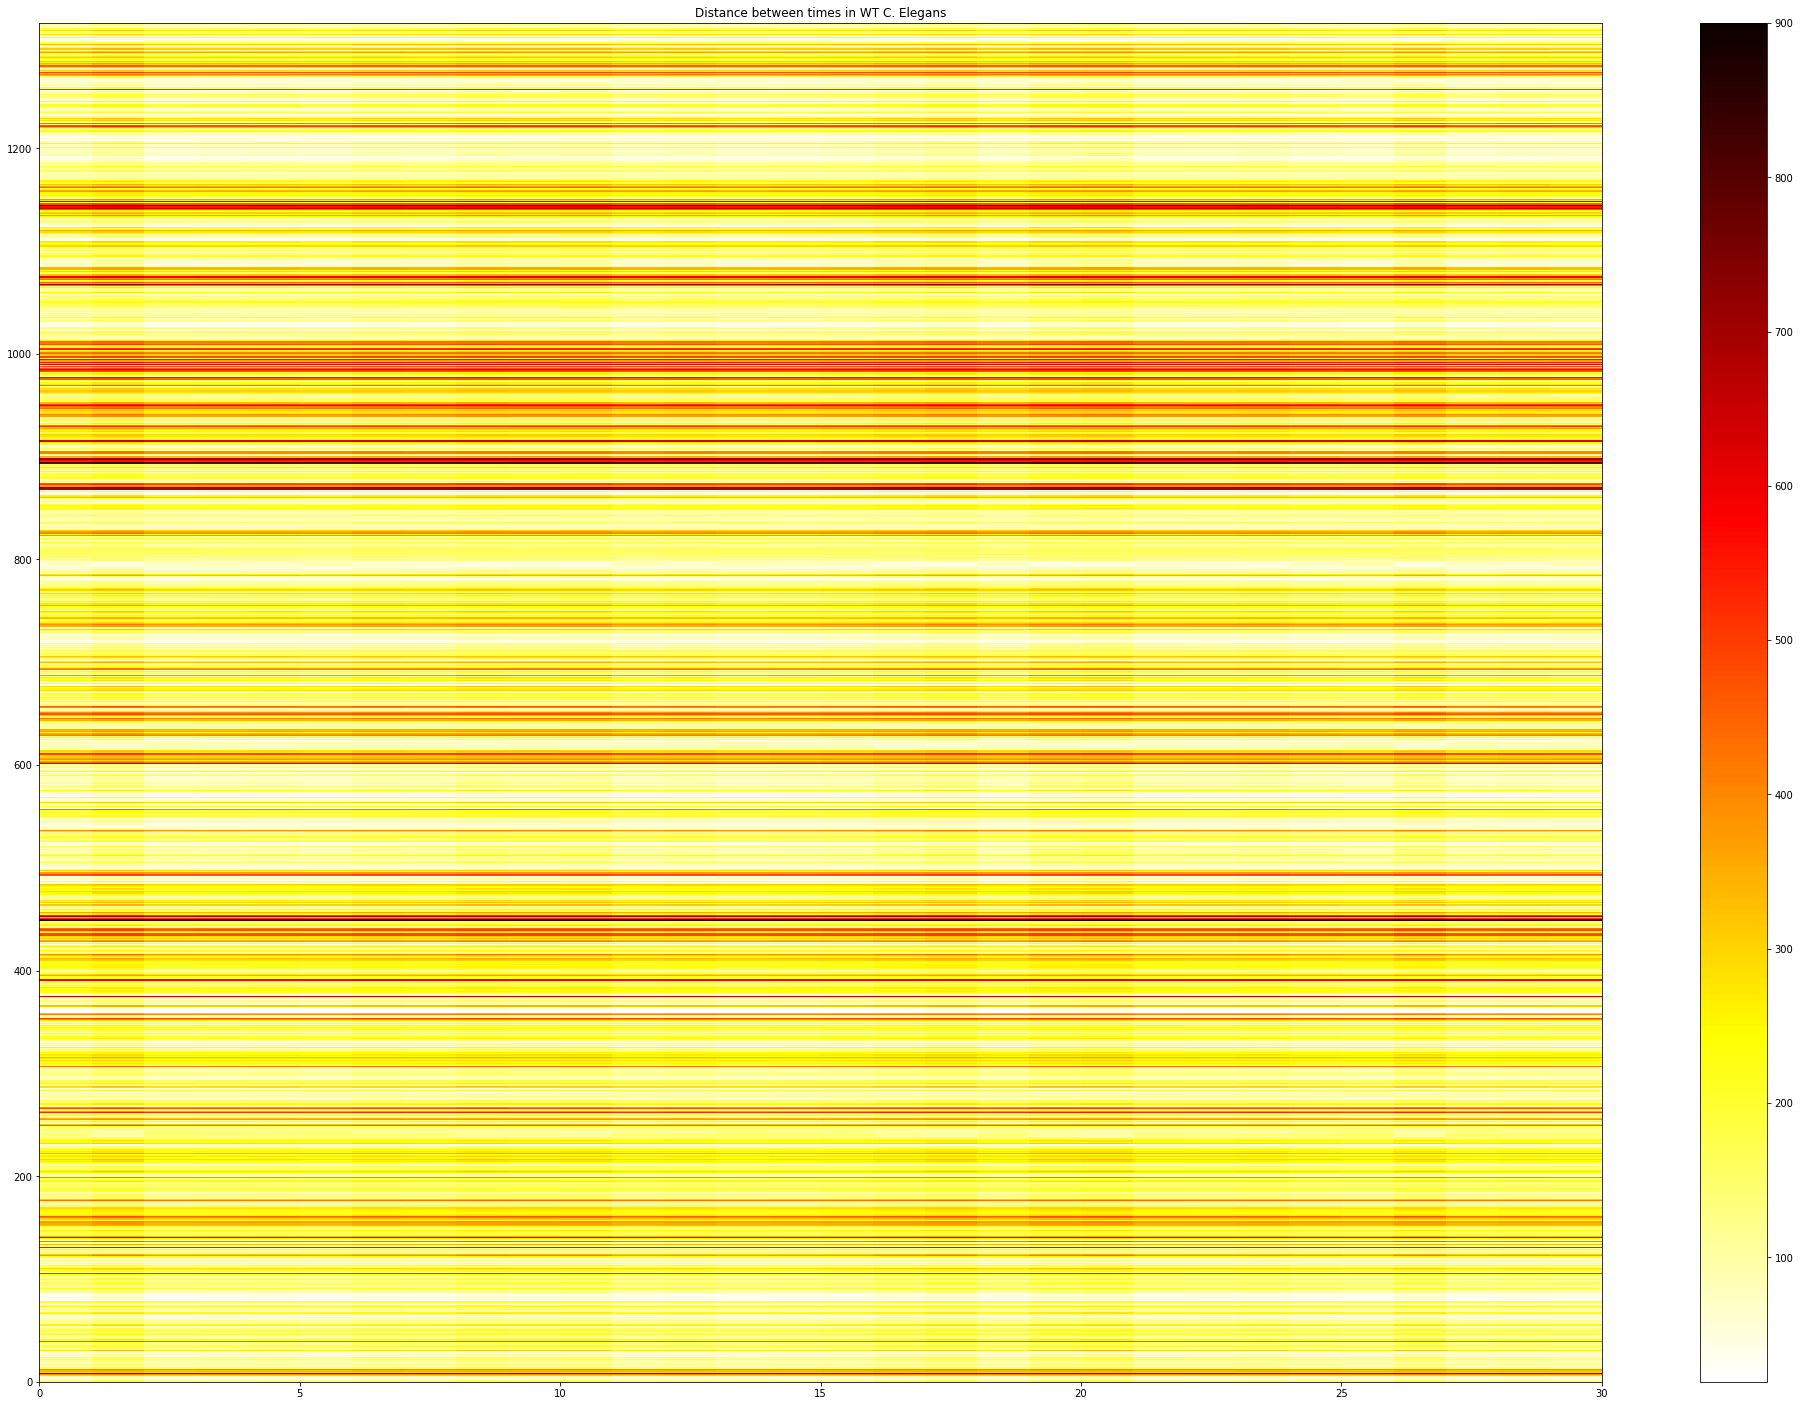

In [989]:
plot_2_examples(['hot_r'],np.mat(b_mat))

In [836]:
RNAi_ted_assignments = dict()
RNAi_bed_assignments = dict()
RNAi_size_assignments = dict()
for n in range(0,len(nameset)):
    pad = nameset[n].split('/')[-1][:-14]
    try:
        x = RNAi_ted_assignments[pad] #appending to existing samples
        #x.append(t_mat[n].tolist()[0])
        q = t_mat[n].tolist()[0]
        x.append(q[0])
        #
        y = RNAi_bed_assignments[pad]
        y.append(b_mat[n].tolist()[0])
        
        #z = RNAi_size_assignments[pad]
        #z.append(size_edit_mat[n].tolist()[0])
        
    except:
        x = list()
        q = t_mat[n].tolist()[0]
        #print(q[0])
        x.append(q[0])
        RNAi_ted_assignments[pad] = x#creating new sample class
        
        y = list()
        y.append(b_mat[n].tolist()[0])
        RNAi_bed_assignments[pad] = y
        
        #z = list()
        #z.append(size_edit_mat[n].tolist()[0])
        #RNAi_size_assignments[pad] = z[0]
        
        
        #print('n',pad,t_mat[n])
    #print(x)
    #padminus = nameset[n-1].split('/')[-1][:-14]
    #if n == 1:
    #    RNAi_assignments[padminus] = t_mat[0]
    #elif padminus != pad:
    #    print(padminus)
    #    RNAi_assignments[padminus] = [t_mat[n-1]]
        #print(RNAi_assignments[nameset[n-1].split('/')[-1][:-14]])
        #RNAi_assignments[nameset[n-1].split('/')[-1][:-14]] = RNAi_assignments[nameset[n-1].split('/')[-1][:-14]] #.hstack(t_mat[n-1])
    #print(nameset[n].split('/')[-1][:-14])
    #nameset2.append(n.split('/')[-1][:-14])



In [ ]:
#RNAi_bed_assignments['ABI-1']

In [926]:
for n in RNAi_ted_assignments: 
    print(n,RNAi_ted_assignments[n],'mu',statistics.mean(RNAi_ted_assignments[n]),'var',statistics.pstdev(RNAi_ted_assignments[n]))


ABI-1 [32, 14, 24, 26, 60, 84] mu 40 var 24.24871130596428
AMA-1 [292, 276, 274, 318, 210, 174] mu 257.3333333333333 var 49.48624949305503
AOS-1 [20, 66, 156, 148, 70, 138] mu 99.66666666666667 var 50.5623927000647
APR-1 [38, 32, 16, 48, 18, 52] mu 34 var 13.662601021279464
APX-1 [6, 12, 8, 14, 6, 22, 16, 16] mu 12.5 var 5.267826876426369
ARX-2 [132, 122, 148, 148, 138, 140] mu 138 var 9.092121131323903
ATX-2 [144, 155, 126, 124] mu 137.25 var 12.871965661856
BUB-1 [152, 160, 142, 152, 142, 126] mu 145.66666666666666 var 10.79608982713443
C01A2.5 [100, 144, 138, 162, 134, 128] mu 134.33333333333334 var 18.669642619920594
C01F1.1 [152, 158, 186, 136, 132] mu 152.8 var 19.20833152566875
C02B10.5 [142, 128, 148, 152, 126, 130, 134] mu 137.14285714285714 var 9.493284414763513
C06A5.1 [148, 144, 128, 174, 162, 140, 136] mu 147.42857142857142 var 14.607797749901962
C07A9.2 [148, 140, 154, 168, 168, 164] mu 157 var 10.567244989431572
C08B11.3 [134, 148, 148, 134, 134, 132, 132] mu 137.4285714

In [951]:
for n in RNAi_bed_assignments: 
    print(n,'mu',np.mean(np.array(RNAi_bed_assignments[n])),'var',np.var(np.array(RNAi_bed_assignments[n])))

ABI-1 mu 97.95512475944969 var 1572.9713111384242
AMA-1 mu 408.15917905159813 var 19678.76233370325
AOS-1 mu 118.27256035242512 var 1607.8125787930674
APR-1 mu 127.22813783023413 var 1077.0453886953917
APX-1 mu 95.22845547176128 var 5818.791268462781
ARX-2 mu 136.47573816509671 var 1876.6395589586332
ATX-2 mu 273.4775346399901 var 13451.463047232995
BUB-1 mu 117.01516637767062 var 2784.9508376060603
C01A2.5 mu 149.42766616571237 var 2184.5392509350863
C01F1.1 mu 165.86018495185604 var 5723.225714402768
C02B10.5 mu 93.84274603966855 var 768.429491924745
C06A5.1 mu 160.05377038279912 var 3604.2905862502134
C07A9.2 mu 154.83932189920816 var 5015.245504904501
C08B11.3 mu 40.213051812040085 var 167.21046396218009
C49H3.8 mu 133.34999155273442 var 1668.4464195523228
C50F2.3 mu 144.68818597444402 var 873.767728313588
C55A6.9 mu 134.40219256740872 var 845.469680692234
CACN-1 mu 248.41624855501007 var 13158.900787188799
CAMT-1 mu 124.46421867585968 var 1746.3182694077839
CBP-1 mu 196.6619446485

In [927]:
#trip = np.sort(np.mat(t_mat).flatten())
#plt.hist(trip)

In [958]:
trip = np.array(RNAi_bed_assignments['ABI-1'])
#print(np.array(trip).flatten())

(array([[1., 1., 2., 0., 0., 1., 1., 0., 0., 0.],
        [0., 1., 1., 0., 2., 0., 0., 1., 0., 1.],
        [2., 2., 0., 0., 1., 0., 1., 0., 0., 0.],
        [2., 2., 0., 0., 1., 0., 1., 0., 0., 0.],
        [2., 0., 2., 0., 1., 0., 1., 0., 0., 0.],
        [1., 3., 0., 0., 1., 1., 0., 0., 0., 0.],
        [1., 1., 2., 0., 0., 1., 0., 1., 0., 0.],
        [2., 0., 2., 0., 0., 1., 0., 1., 0., 0.],
        [1., 1., 0., 1., 1., 0., 0., 1., 1., 0.],
        [1., 1., 0., 2., 0., 0., 1., 0., 1., 0.],
        [1., 1., 0., 1., 1., 0., 0., 1., 1., 0.],
        [1., 3., 0., 0., 1., 0., 1., 0., 0., 0.],
        [1., 1., 2., 0., 0., 1., 0., 1., 0., 0.],
        [0., 4., 0., 0., 1., 0., 1., 0., 0., 0.],
        [2., 2., 0., 0., 1., 0., 1., 0., 0., 0.],
        [1., 1., 2., 0., 1., 0., 1., 0., 0., 0.],
        [1., 1., 0., 2., 0., 0., 1., 0., 1., 0.],
        [1., 0., 1., 0., 2., 0., 0., 1., 0., 1.],
        [2., 0., 2., 0., 1., 0., 1., 0., 0., 0.],
        [1., 1., 0., 0., 2., 0., 0., 1., 0., 1.],


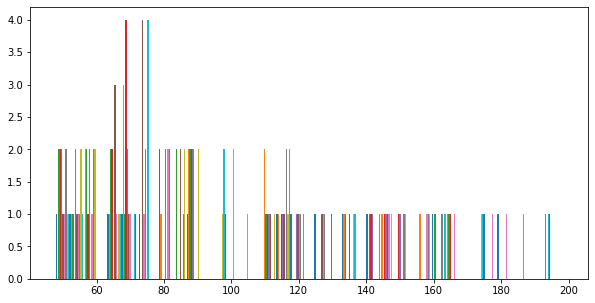

In [959]:
plt.hist(trip)
#plt.savefig('foo1.png')

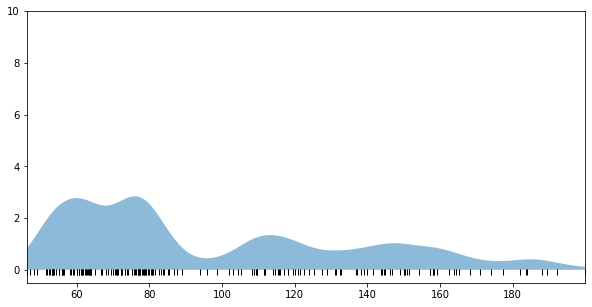

In [960]:
trip = trip.flatten()
from scipy.stats import norm
x_d = np.linspace(min(trip), max(trip), 2000)
density = sum(norm(xi,5).pdf(x_d) for xi in trip) * 1
plt.fill_between(x_d, density, alpha=0.5)
plt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)
plt.axis([min(trip), max(trip), -0.5, 10]);
#plt.savefig('foo2.png')

In [941]:
for n in RNAi_bed_assignments: 
    
    trip = np.array(RNAi_bed_assignments['APX-1'])
    trip = np.array(trip).flatten()
    plt.hist(trip)
    plt.savefig('.png')
    #print(trip.shape)
    #print(n,RNAi_ted_assignments[n],'mu',statistics.mean(RNAi_ted_assignments[n]),'var',statistics.pstdev(RNAi_ted_assignments[n]))
#trip

In [409]:
#plot_2_examples(['hot_r'],np.mat(b_mat).T)

In [420]:
'''x = np.argsort(b_mat.sum(axis=0))[0]#[::-1]
x = np.flip(x, 1)
print(x)
plot_2_examples(['hot_r'],np.mat(b_mat[x][0]))

b_mat = np.mat(b_mat)
x = np.array(np.argsort(np.mat(b_mat).sum(axis=0)))[0]
x = np.flip(x, 0)
#print(len(x[0]),x[0])
#r_mat = np.mat(r_mat)
#plot_2_examples(['hot'],np.mat(r_mat[x]))
plot_2_examples(['hot_r'],np.mat(b_mat.T)[x]) 
sortlists.append(x)
sortlists'''

"x = np.argsort(b_mat.sum(axis=0))[0]#[::-1]\nx = np.flip(x, 1)\nprint(x)\nplot_2_examples(['hot_r'],np.mat(b_mat[x][0]))\n\nb_mat = np.mat(b_mat)\nx = np.array(np.argsort(np.mat(b_mat).sum(axis=0)))[0]\nx = np.flip(x, 0)\n#print(len(x[0]),x[0])\n#r_mat = np.mat(r_mat)\n#plot_2_examples(['hot'],np.mat(r_mat[x]))\nplot_2_examples(['hot_r'],np.mat(b_mat.T)[x]) \nsortlists.append(x)\nsortlists"

In [868]:
t_mat.T[0]

matrix([[ 32,  14,  24, ..., 182, 134, 122]])

1

(array([[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([  6. ,  37.2,  68.4,  99.6, 130.8, 162. , 193.2, 224.4, 255.6,
        286.8, 318. ]),
 <a list of 1322 BarContainer objects>)

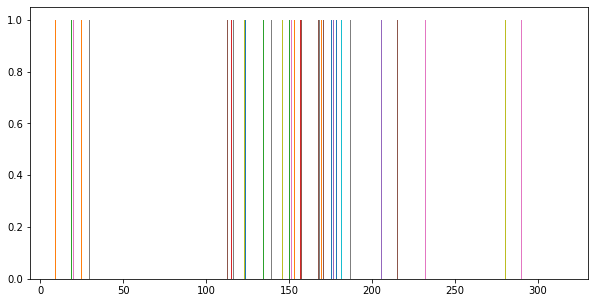

In [869]:
#trip = np.triu(np.mat(b_mat))
#trip = np.sort(np.mat(t_mat[0]).flatten())
#trip = trip[int(len(trip)/2)+truncator:]

trip = t_mat.T[0]

plt.hist(trip)




#trip = b_mat.sum(axis=0)/200

#trip = trip.tolist()[0]

#plt.hist(trip ) 


In [973]:
fulldictset = refdictset + dictset
fullnameset = refnameset + nameset


In [977]:
b_mat_2 = []
size_edit_mat_2 = []
t_mat_2 = []
for n in range(0,len(fulldictset)):
    t_row = []
    r_row = []
    b_row = []
    for m in range(0,len(fulldictset)):
        #go = cleaner(refdictset,refglobaldictset,m,match_links,dictset,globaldictset,n)
        go = fulldictset[m]
        r_row.append(len(go))
        t_row.append(tree_edit_distance(go,fulldictset[n]))
        b_row.append(branch_distance(go,fulldictset[n]))
    size_edit_mat_2.append(r_row)
    t_mat_2.append(t_row)
    b_mat_2.append(b_row)
    if n % 20 == 0: print(n / len(fulldictset))
size_edit_mat_2 = np.mat(size_edit_mat_2)

0.0
0.014792899408284023
0.029585798816568046
0.04437869822485207
0.05917159763313609
0.07396449704142012
0.08875739644970414
0.10355029585798817
0.11834319526627218
0.13313609467455623
0.14792899408284024
0.16272189349112426
0.17751479289940827
0.19230769230769232
0.20710059171597633
0.22189349112426035
0.23668639053254437
0.2514792899408284
0.26627218934911245
0.28106508875739644
0.2958579881656805
0.3106508875739645
0.3254437869822485
0.34023668639053256
0.35502958579881655
0.3698224852071006
0.38461538461538464
0.3994082840236686
0.41420118343195267
0.4289940828402367
0.4437869822485207
0.45857988165680474
0.47337278106508873
0.4881656804733728
0.5029585798816568
0.5177514792899408
0.5325443786982249
0.5473372781065089
0.5621301775147929
0.5769230769230769
0.591715976331361
0.606508875739645
0.621301775147929
0.636094674556213
0.650887573964497
0.665680473372781
0.6804733727810651
0.6952662721893491
0.7100591715976331
0.7248520710059172
0.7396449704142012
0.7544378698224852
0.76923

In [980]:
size_edit_mat_2 = np.mat(size_edit_mat_2)
b_mat_2 = np.mat(b_mat_2)
t_mat_2 = np.mat(t_mat_2)

print(size_edit_mat_2.shape,b_mat_2.shape,t_mat_2.shape)

(1352, 1352) (1352, 1352) (1352, 1352)


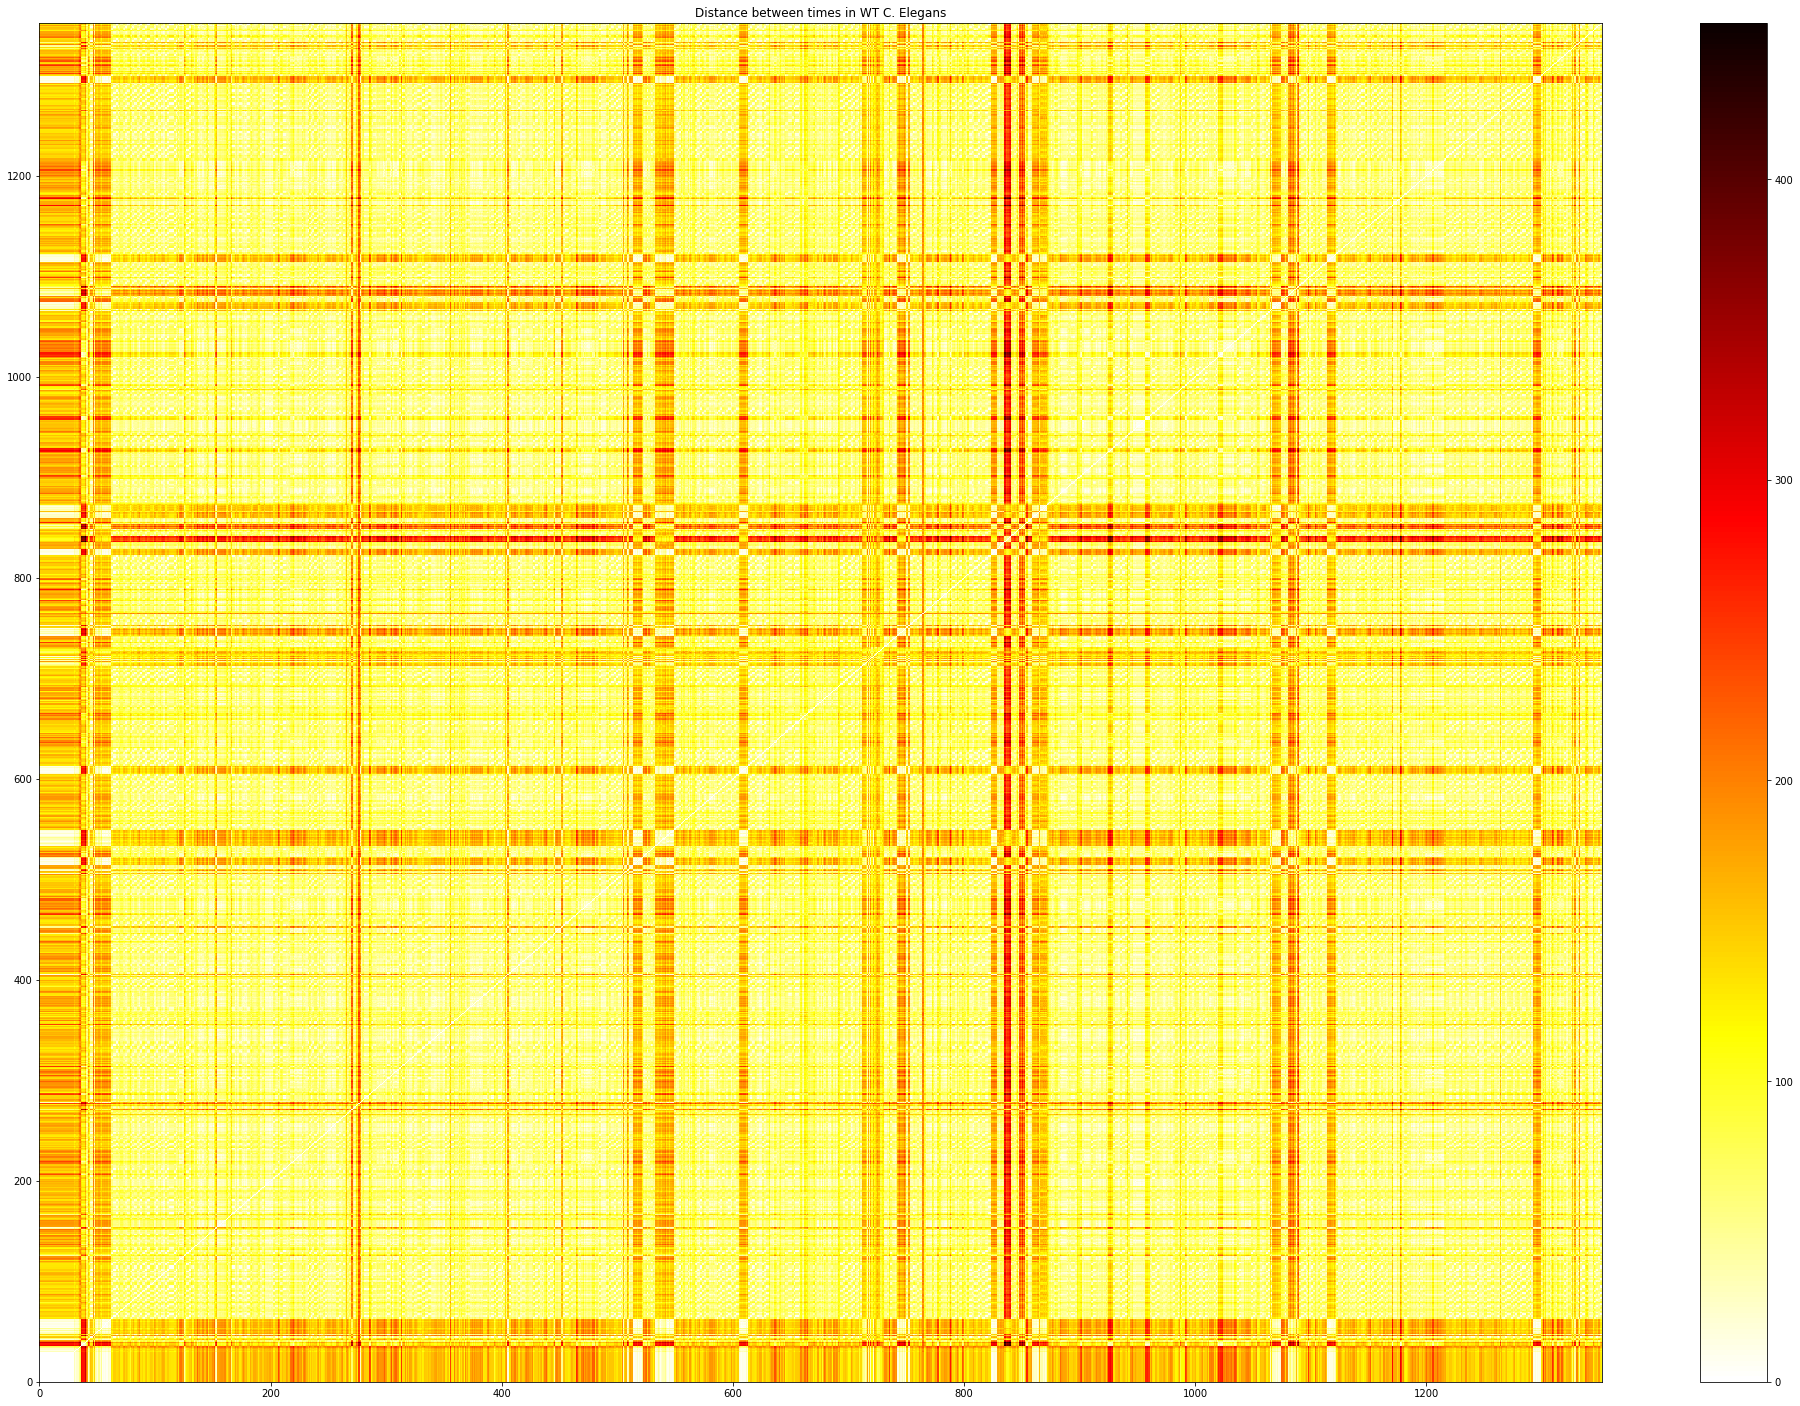

In [982]:
plot_2_examples(['hot_r'],np.mat(t_mat_2))

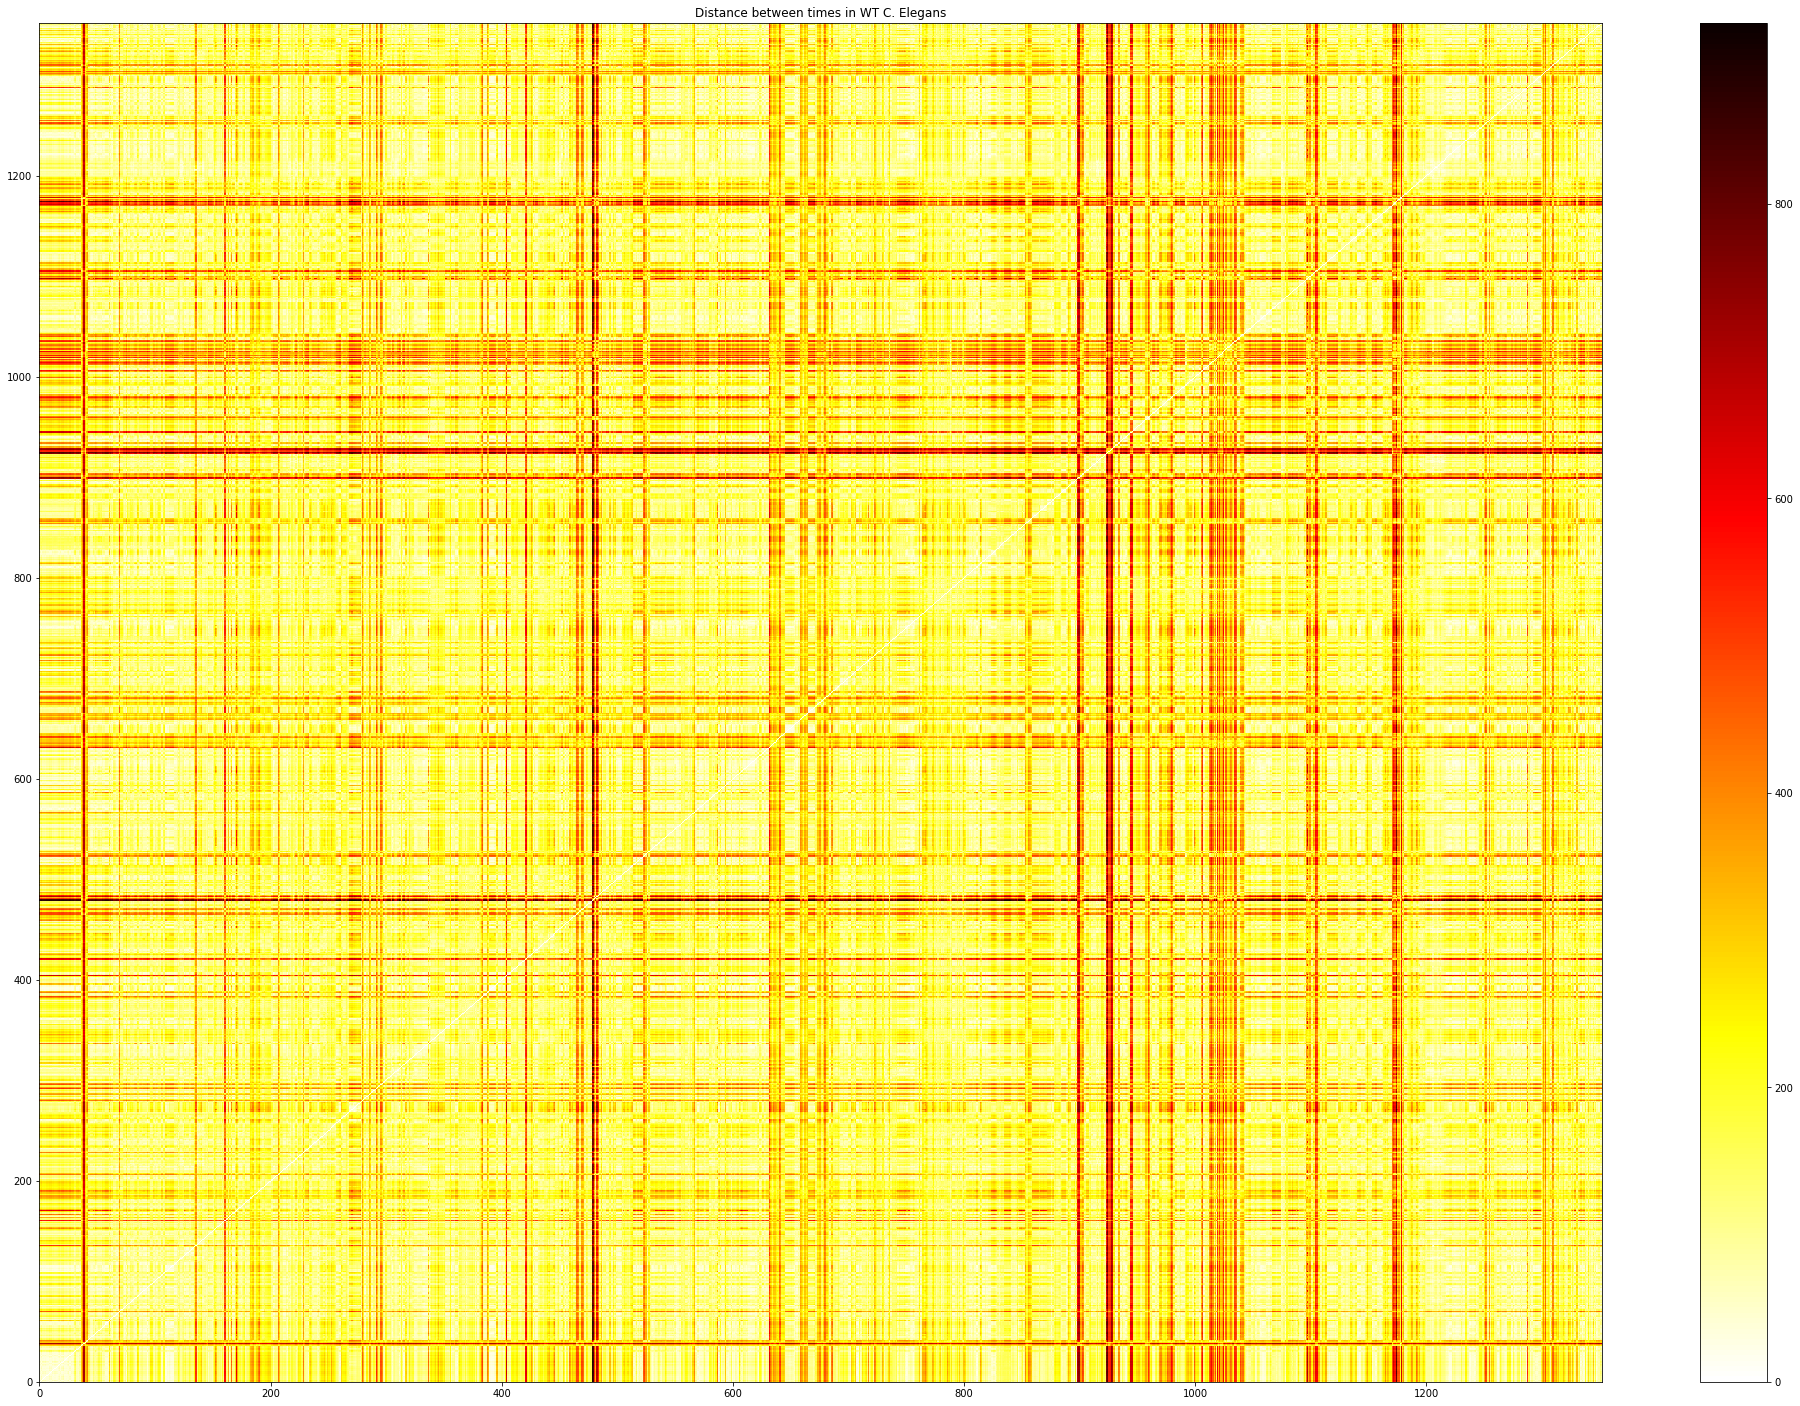

In [983]:
plot_2_examples(['hot_r'],np.mat(b_mat_2))

In [426]:
'''x = np.argsort(bg_mat.sum(axis=0))[0]#[::-1]
x = np.flip(x, 1)
print(x)
plot_2_examples(['hot_r'],np.mat(bg_mat[x][0]))


bg_mat = np.mat(bg_mat)
x = np.array(np.argsort(np.mat(bg_mat).sum(axis=0)))[0]
x = np.flip(x, 0)
#print(len(x[0]),x[0])
#r_mat = np.mat(r_mat)
#plot_2_examples(['hot'],np.mat(r_mat[x]))
plot_2_examples(['hot_r'],np.mat(bg_mat.T)[x]) 
sortlists.append(x)
sortlists'''

"x = np.argsort(bg_mat.sum(axis=0))[0]#[::-1]\nx = np.flip(x, 1)\nprint(x)\nplot_2_examples(['hot_r'],np.mat(bg_mat[x][0]))\n\n\nbg_mat = np.mat(bg_mat)\nx = np.array(np.argsort(np.mat(bg_mat).sum(axis=0)))[0]\nx = np.flip(x, 0)\n#print(len(x[0]),x[0])\n#r_mat = np.mat(r_mat)\n#plot_2_examples(['hot'],np.mat(r_mat[x]))\nplot_2_examples(['hot_r'],np.mat(bg_mat.T)[x]) \nsortlists.append(x)\nsortlists"

In [427]:
#sortlistT.append(np.flip(np.array(np.argsort(np.mat(bg_mat).T.sum(axis=0)))[0], 0))
#sortlistT

In [428]:
'''trip = np.triu(np.mat(bg_mat))
trip = np.sort(trip.flatten())
#trip = trip[int(len(trip)/2)+truncator:]

plt.hist(trip, bins =200 ) 

trip = bg_mat.sum(axis=0)/200

trip = trip.tolist()[0]

plt.hist(trip ) '''


'trip = np.triu(np.mat(bg_mat))\ntrip = np.sort(trip.flatten())\n#trip = trip[int(len(trip)/2)+truncator:]\n\nplt.hist(trip, bins =200 ) \n\ntrip = bg_mat.sum(axis=0)/200\n\ntrip = trip.tolist()[0]\n\nplt.hist(trip ) '

In [429]:
'''x_d = np.linspace(min(trip), max(trip), 2000)
density = sum((abs(xi - x_d) < 5) for xi in trip)

plt.fill_between(x_d, density, alpha=0.5)
#plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)
plt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)

plt.axis([min(trip), max(trip), -0.1, 170]);'''

"x_d = np.linspace(min(trip), max(trip), 2000)\ndensity = sum((abs(xi - x_d) < 5) for xi in trip)\n\nplt.fill_between(x_d, density, alpha=0.5)\n#plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)\nplt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)\n\nplt.axis([min(trip), max(trip), -0.1, 170]);"

In [410]:
'''from scipy.stats import norm
x_d = np.linspace(min(trip), max(trip), 2000)
density = sum(norm(xi,4).pdf(x_d) for xi in trip) * 1
plt.fill_between(x_d, density, alpha=0.5)
plt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)
plt.axis([min(trip), max(trip), -0.5, 20]);'''

"from scipy.stats import norm\nx_d = np.linspace(min(trip), max(trip), 2000)\ndensity = sum(norm(xi,4).pdf(x_d) for xi in trip) * 1\nplt.fill_between(x_d, density, alpha=0.5)\nplt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)\nplt.axis([min(trip), max(trip), -0.5, 20]);"

"plot_2_examples(['hot_r'],np.mat(bs_mat).T)"

'trip = np.triu(np.mat(bs_mat))\ntrip = np.sort(trip.flatten())\n#trip = trip[int(len(trip)/2)+truncator:]\n\nplt.hist(trip, bins = 200 )'

"x_d = np.linspace(min(trip), max(trip), 2000)\ndensity = sum((abs(xi - x_d) < .45) for xi in trip)\n\nplt.fill_between(x_d, density, alpha=0.5)\n#plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)\nplt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)\n\nplt.axis([min(trip), max(trip), -0.1, 210]);"

"plot_2_examples(['hot_r'],np.mat(bgs_mat).T)"

'trip = np.triu(np.mat(bgs_mat))\ntrip = np.sort(trip.flatten())\n#trip = trip[int(len(trip)/2)+truncator:]\n\nplt.hist(trip, bins = 200)'

"\nx_d = np.linspace(min(trip), max(trip), 2000)\ndensity = sum((abs(xi - x_d) < .5) for xi in trip)\n\nplt.fill_between(x_d, density, alpha=0.5)\n#plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)\nplt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)\n\nplt.axis([min(trip), max(trip), -0.1, 70]);"

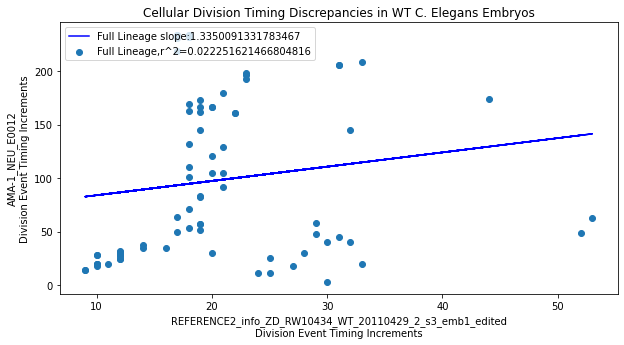

In [699]:
def dict_to_scatter_connect(name,lis,x,yname,ylis,y,img = False,seps='', tier = False):
    xaxis = [];yaxis = []
    target_xaxis=[];target_yaxis=[]
    if seps == '' or tier == True:
        for n in (list(set(lis[x]).intersection(set(ylis[y])))):
            xaxis.append(lis[x][n]);yaxis.append(ylis[y][n])
    else:
        target_xaxis=[];target_yaxis=[]
        for n in (list(set(lis[x]).intersection(set(ylis[y])))):
            if seps in n:
                target_xaxis.append(lis[x][n])
                target_yaxis.append(ylis[y][n])
            else:
                xaxis.append(lis[x][n]);yaxis.append(ylis[y][n])
    target_xaxis = np.array(target_xaxis);xaxis = np.array(xaxis)
    if tier == True: return xaxis, yaxis
    m, b, r, p_value, std_err = stats.linregress(np.append(xaxis,target_xaxis),yaxis+target_yaxis)
    #switch to siegelslope & theilsslope functions?
    name1,name2 = name[x].split('/')[-1][:-4],yname[y].split('/')[-1][:-4]
    if img == False: return m,b,r,name1,name2
    plt.scatter(xaxis,yaxis, label='Full Lineage,r^2='+str(r**2) ) #''', c = [0]*len(xaxis) ''')
    plt.title('Cellular Division Timing Discrepancies in WT C. Elegans Embryos');plt.xlabel(name1+'\nDivision Event Timing Increments');plt.ylabel(name2+'\nDivision Event Timing Increments')
    plt.plot(xaxis, (m*xaxis) + b, 'b-', label='Full Lineage slope:'+str(m), )
    if seps != '':
        target_xaxis = np.array(target_xaxis)
        m, b, r, p_value, std_err = stats.linregress(target_xaxis,target_yaxis)
        plt.plot(target_xaxis, (m*target_xaxis) + b, 'r-', label=seps+' slope:'+str(m))
        plt.scatter(target_xaxis,target_yaxis, label = seps+',r^2='+str(r**2) ) #''', c = [1]*len(target_xaxis) ''')
        xaxis = np.append(xaxis,target_xaxis); yaxis = np.append(yaxis,target_yaxis)
    m, b, r, p_value, std_err = stats.linregress(xaxis,yaxis)
    plt.legend(loc='upper left')
    #print(xaxis,target_xaxis)
    #print(np.append(xaxis,target_xaxis))
    #print(yaxis,target_yaxis)
    #print(np.append(yaxis,target_yaxis))
    #plt.savefig(name1+'&'+name2+'.png') #return m,b,r,name1,name2
    plt.show()
    
dict_to_scatter_connect(refnameset,refdictset,1,nameset,dictset,9,img=True)